## **Problem Statement**
The aim of this project is to conduct a comprehensive analysis of the frequency distribution of words within H. G. Wellʼs novel The Time Machine. By employing simple Natural Language Processing (NLP) methodologies, the project seeks to identify and quantify the most frequently used words in the text. This analysis uses key techniques for handling, processing, and analyzing unstructured textual data, which constitutes a significant portion of global data resources.

### **Objective**: 
To identify and visualize the most frequently occurring words.
### **Deliverable**: 
A list of the top 10 most frequently occurring words and their corresponding counts, with standard stop words excluded.
### **Data Collection**
Extract the complete text of The Time Machine from the Project Gutenberg website. Use bs4 library to pull the data from the html.

In [56]:
import requests
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re
from collections import Counter
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
url = 'https://www.gutenberg.org/cache/epub/35/pg35-images.html'
#requesting the data through http call
r = requests.get(url)
r.encoding = 'utf-8'
html = r.text
soup = BeautifulSoup(html)
text = soup.text

### **Data Cleaning**
In this step remove the irrelevant text and finalize the string for analysis.

In [57]:
#removing the irrelevant text from the received text
text = text.split('Epilogue', 1)[-1].strip()
text = text.split('*** END OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***', 1)[0].strip()
print(text)

I.
Introduction

The Time Traveller (for so it will be convenient to speak of him) was
expounding a recondite matter to us. His pale grey eyes shone and twinkled, and
his usually pale face was flushed and animated. The fire burnt brightly,
and the soft radiance of the incandescent lights in the lilies of silver
caught the bubbles that flashed and passed in our glasses. Our chairs,
being his patents, embraced and caressed us rather than submitted to be sat
upon, and there was that luxurious after-dinner atmosphere, when thought
runs gracefully free of the trammels of precision. And he put it to us in
this way—marking the points with a lean forefinger—as we sat
and lazily admired his earnestness over this new paradox (as we thought it)
and his fecundity.


“You must follow me carefully. I shall have to controvert one or
two ideas that are almost universally accepted. The geometry, for instance,
they taught you at school is founded on a misconception.”


“Is not that rather a large thing 

### **Data Preprocessing**

1. Convert all words to lowercase for standardization.
2. Remove non-alphabetic characters.
3. Tokenize the text to facilitate analysis.
4. Removing stop-words

In [58]:
#converting the string to lowercase
text_lower = text.lower()

#removing non alphabetic character
def remove_special(word):
    return re.sub(r'[^a-zA-Z]', ' ', word)
text_lower = remove_special(text_lower)

#tokenize words
text_tokenized = word_tokenize(text_lower)

#removing the stopwords
stopword = set(stopwords.words('english'))
text_final = []
for word in text_tokenized:
    if(word not in stopword):
        text_final.append(word)
print(text_final)

['introduction', 'time', 'traveller', 'convenient', 'speak', 'expounding', 'recondite', 'matter', 'us', 'pale', 'grey', 'eyes', 'shone', 'twinkled', 'usually', 'pale', 'face', 'flushed', 'animated', 'fire', 'burnt', 'brightly', 'soft', 'radiance', 'incandescent', 'lights', 'lilies', 'silver', 'caught', 'bubbles', 'flashed', 'passed', 'glasses', 'chairs', 'patents', 'embraced', 'caressed', 'us', 'rather', 'submitted', 'sat', 'upon', 'luxurious', 'dinner', 'atmosphere', 'thought', 'runs', 'gracefully', 'free', 'trammels', 'precision', 'put', 'us', 'way', 'marking', 'points', 'lean', 'forefinger', 'sat', 'lazily', 'admired', 'earnestness', 'new', 'paradox', 'thought', 'fecundity', 'must', 'follow', 'carefully', 'shall', 'controvert', 'one', 'two', 'ideas', 'almost', 'universally', 'accepted', 'geometry', 'instance', 'taught', 'school', 'founded', 'misconception', 'rather', 'large', 'thing', 'expect', 'us', 'begin', 'upon', 'said', 'filby', 'argumentative', 'person', 'red', 'hair', 'mean',

### **Exploratory Data Analysis**
1. Count the occurrence of each word.
2. Extract the 10 most frequently used words.

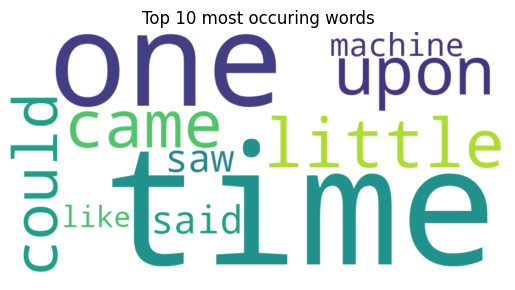

In [59]:
freq = Counter(text_final)
wordscld = WordCloud(height=400, width= 800,background_color= 'white', colormap='viridis', max_words=10)
cloud  = wordscld.generate_from_frequencies(freq)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 10 most occuring words")
plt.show()

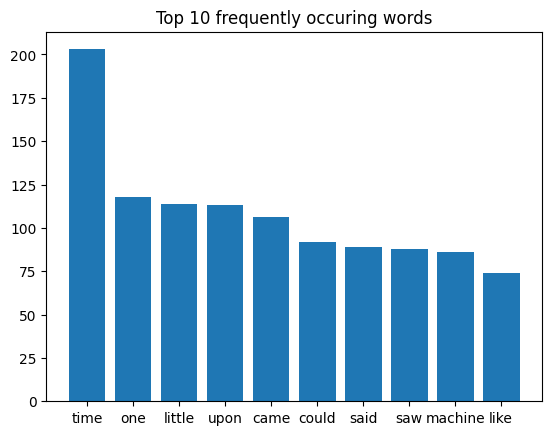

In [60]:
freq_db = pd.DataFrame(freq.items(), columns=['Word', 'Frequency'])
freq_db = freq_db.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
freq_db = freq_db[:10]
words = freq_db["Word"]
frequency = freq_db["Frequency"]

plt.bar(words,frequency)
plt.title("Top 10 frequently occuring words")
plt.show()